In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


# importing data

In [ ]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow

df_train = pd.read_csv("train.csv") # read lines from the training data file from working directory
df_test= pd.read_csv("test.csv")

Label: 15


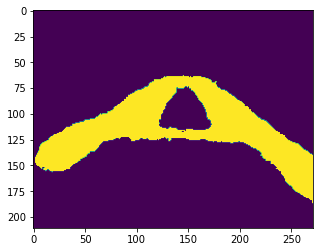

In [ ]:
i = 2 # set any valid index of an image
label = df_train.values[i][1] # retrieve label from first colum in dataframe
im_buf = df_train.values[i][2:] # create flat array of only the pixels of the given image 
#axis_len = int(np.sqrt(im_buf.shape[0])) # calculate the dimensions of the square image
im_array = np.int8(np.reshape(im_buf, (211, 271))) # create a 2D array from flat array
img = Image.fromarray(im_array, 'L') # convert to a PIL.Image object ('L' is for grayscale)

print(f'Label: {label}')
imshow(np.asarray(img))
#img.show()

In [ ]:
df_train

,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel57141,pixel57142,pixel57143,pixel57144,pixel57145,pixel57146,pixel57147,pixel57148,pixel57149,pixel57150,pixel57151,pixel57152,pixel57153,pixel57154,pixel57155,pixel57156,pixel57157,pixel57158,pixel57159,pixel57160,pixel57161,pixel57162,pixel57163,pixel57164,pixel57165,pixel57166,pixel57167,pixel57168,pixel57169,pixel57170,pixel57171,pixel57172,pixel57173,pixel57174,pixel57175,pixel57176,pixel57177,pixel57178,pixel57179,pixel57180
0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,2994,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2995,2995,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2996,2996,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2997,2997,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### splitting data into input and output 

In [ ]:
X=df_train.iloc[:,2:]
Y=df_train.label


#### splitting data into train and test 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

In [ ]:
print("Training set images shape: {}".format(X_train.shape))
print("Training set labels shape: {}".format(Y_train.shape))

Training set images shape: (2999, 57181)
Training set labels shape: (2999,)


### Modeling using svm

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
y_prediction = clf.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_prediction))

Accuracy: 0.9988888888888889


#### Making prediction

In [ ]:
test_pred=clf.predict(df_test.iloc[:,1:])

In [ ]:
ids=df_test.id.values

In [ ]:
data = {'id': ids,
        'label': test_pred
        }
mySubmission = pd.DataFrame(data)
print (mySubmission)

       id  label
0    3000     14
1    3001     10
2    3002     14
3    3003      5
4    3004      7
..    ...    ...
994  3994      3
995  3995      3
996  3996     11
997  3997      5
998  3998      8

[999 rows x 2 columns]


In [ ]:
mySubmission.to_csv("submission.csv",index=False)